# Downloading the Iris dataset

In [3]:
import pandas as pd

df_iris = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,sep=',' )
df_iris.columns = ['sep_len','sep_wid','pet_len','pet_wid','class']
df_iris.head()

,sep_len,sep_wid,pet_len,pet_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Iris dataset contains the measurements for 150 iris flowers from 3 different species and has 5 features - sepal length, sepal width, petal length, petal width and class(species). Hence this is a 150x5 matrix.

### Split the data into class labels-Y and the remaining- X. X has 4 dimensions ande hence visualising the data is not possible, hence we will perform the PCA on X and bring it down to 2 dimensions to visualise.

In [4]:
X = df_iris[df_iris.columns[0:4]]
Y = df_iris['class']

## Step 1 - Standardise the data since the measurements can be of different scales

In [5]:
from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)

#Xs is an array of 150x4

## Step2 - Covariance matrix

In [6]:
# Cov function from numpy can be used for creating the covariance matrix
import numpy as np
cov = np.cov(Xs.T)
cov
# covariance matrix cov is a 4x4 matrix.

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Step 3 - Eigendecomposition

In [7]:
# we can use the linear algebra function of numpy, linalg.eig for eigendecomposition
eig_val,eig_vec = np.linalg.eig(cov)
print('eigenvalues -',eig_val)
print('eigenvector -',eig_vec)
#eigenvalues are 4 and eigenvector is a 4x4 matrix ordered by eigenvalues

eigenvalues - [2.93035378 0.92740362 0.14834223 0.02074601]
eigenvector - [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


## Step 4 - Selecting the 2 dimensional data - this is done by calculating the explained variance ratio 

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xs)
print(pca.explained_variance_ratio_)
# As we can see the first two components explains the most variance of the data. PC1 - 72.77% and PC2 - 23.03%, 
#together they explain 95.80% of the variance in the data

[0.72770452 0.23030523]


In [41]:
W = eig_vec[0:4,0:2]
proj = Xs.dot(W)
prindata = pd.DataFrame(data = proj
             , columns = ['PC1', 'PC2'])
finaldata = pd.concat([prindata, Y], axis = 1)
finaldata.tail()

,PC1,PC2,class
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica
149,0.959299,0.022284,Iris-virginica


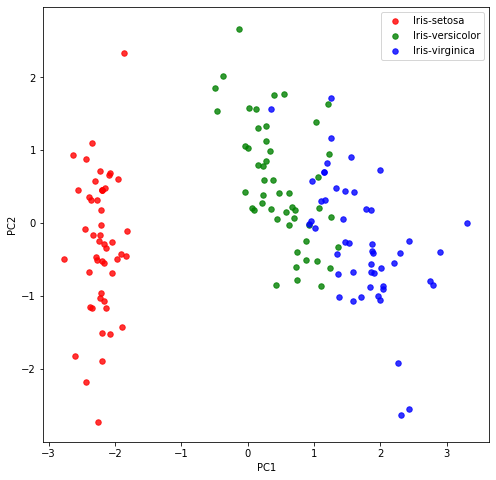

In [56]:
import matplotlib.pyplot as plt
colors = ("red", "green", "blue")
groups = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

# Create plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

for color, group in zip(colors, groups):
    legends = finaldata['class'] == group
    ax.scatter(finaldata.loc[legends, 'PC1']
               , finaldata.loc[legends, 'PC2'], alpha=0.8, c=color,  s=30, label=group)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(groups)
plt.show()